## Modelo preditivo para renda

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```.

Avaliaremos a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações com o propósito de identificar algum padrão interessante ou que faça sentido.

### Carregando os dados e os pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.drop(columns = ['Unnamed: 0', 'index'], inplace = True)
df.head(2)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14


### Pairplot das variáveis quantitativas

In [4]:
#Observação dos tipos de dados e de missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

In [5]:
#Tratamento de missings
df.fillna(df.mean(), inplace = True)
df.isna().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

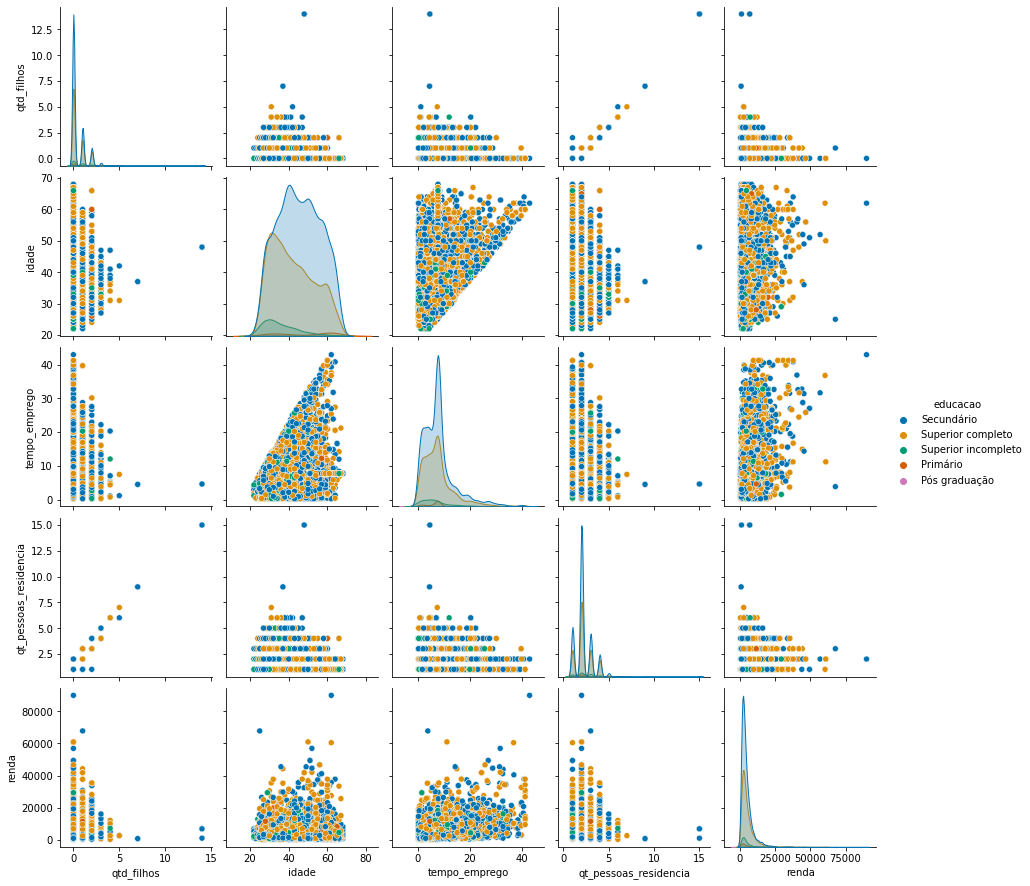

In [6]:
#Plot da distribuição bivariada dos pares de variáveis quantitativas
sns.pairplot(data = df,
             vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
             hue = 'educacao',
             palette = 'colorblind')

### Clustermap das correlações entre variáveis

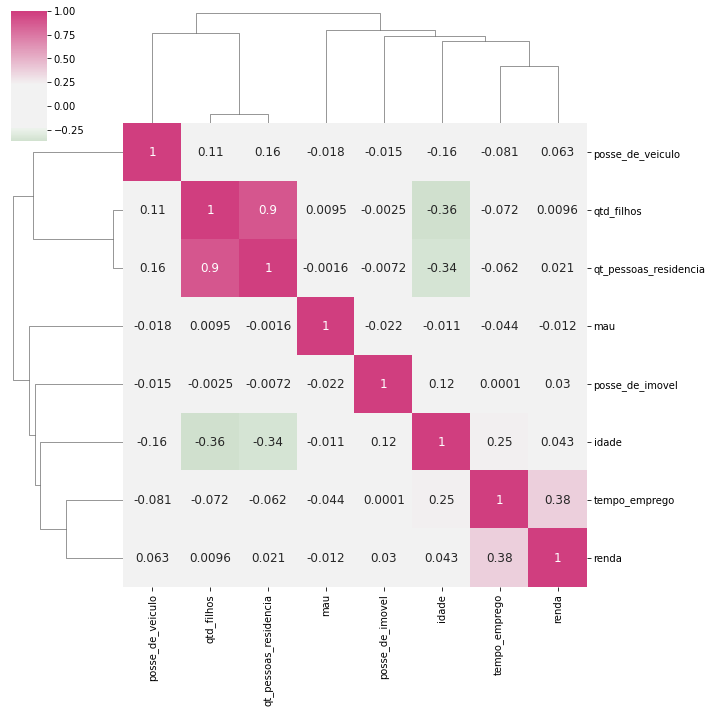

In [7]:
cmap = sns.diverging_palette(h_neg = 125, h_pos = 350, sep = 60, as_cmap = True, center = 'light')
sns.clustermap(data = df.corr(), center = 0, cmap = cmap, annot = True, annot_kws={'fontsize':12});

As variáveis `qtd_filhos` e `qt_pessoas_residencia` apresentam um alta correlação entre si. As variáveis `tempo_emprego` e `idade`são as que mais estão correlacionadas com `renda`. Agora, vamos avaliar um gráfico de dispersão (scatterplot) específico para as duas variáveis mais correlacionadas com renda.

### Gráfico de dispersão: *tempo de emprego* x *renda e idade x renda*

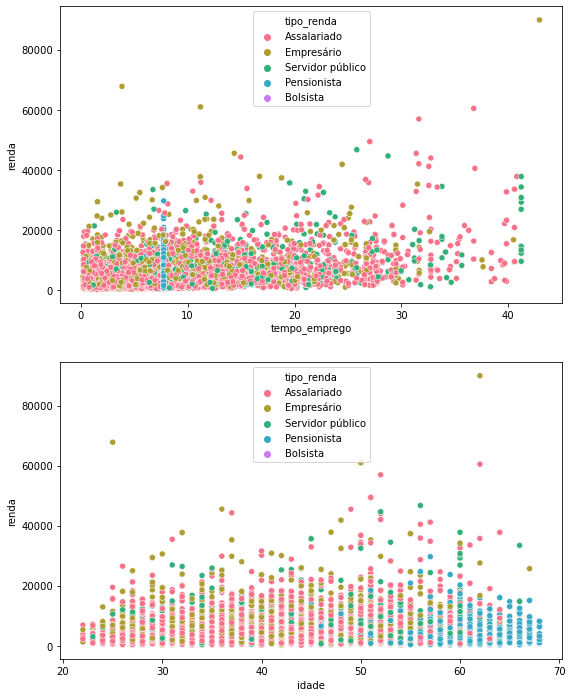

In [8]:
#Scatterplot categorizada por tipo de renda 
fig, ax = plt.subplots(2, 1, figsize = (9, 12))

for i, var in enumerate(['tempo_emprego', 'idade']):
    sns.scatterplot(ax = ax[i], 
                    x = var, 
                    y = 'renda', 
                    hue = 'tipo_renda', 
                    data = df, 
                    palette = 'husl')
plt.subplots_adjust(hspace = 0.2)

Observa-se que a maioria dos dados são de assalariados e empresários. Além disso, há uma maior concentração de pontos para valores de renda inferiores a 20000.

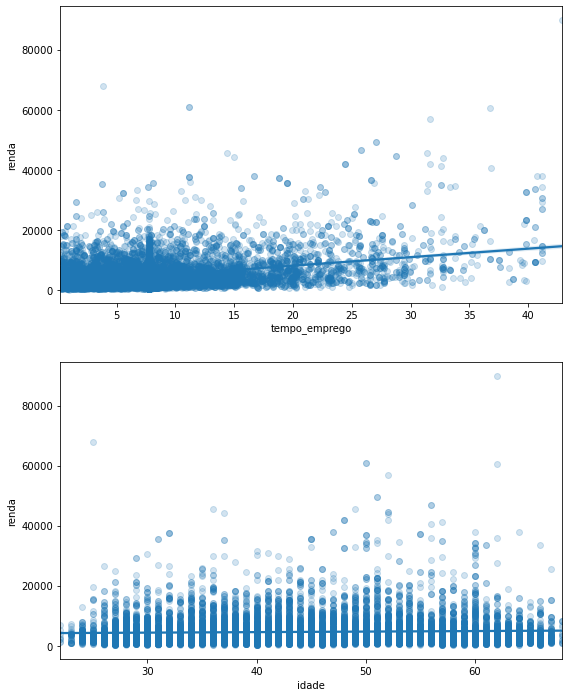

In [9]:
### Visualização do ajuste dos dados ao modelo de regressão linear
fig, ax = plt.subplots(2, 1, figsize = (9, 12))
for i, var in enumerate(['tempo_emprego', 'idade']):
    sns.regplot(ax = ax[i], 
                x = var, 
                y = 'renda', 
                data = df, 
                scatter_kws = {'alpha':0.2})
plt.subplots_adjust(hspace = 0.2)

### Remoção de *pontos influentes*

In [10]:
#Percentual de clientes com renda menor ou igual a 20000
np.mean(df.renda <= 20000)

0.9856666666666667

In [11]:
#Percentual de clientes com renda menor ou igual a 23000
np.mean(df.renda <= 23000)

0.9904666666666667

Cerca de 99% dos clientes possuem renda menor ou igual a 23000. Agora, vamos filtrar esses dados e criar uma categoria para diferentes faixas de renda para futuro insights.

In [12]:
df_2 = df[df.renda <= 23000].copy()
df_2.shape

(14857, 14)

In [13]:
#categorizando os dados de renda
renda_cat = pd.cut(df_2.renda, 
                   [0, 1500, 3000, 5000, 7000, 10000, 15000, 23000])
renda_cat

0         (3000, 5000]
1         (5000, 7000]
2         (5000, 7000]
3        (7000, 10000]
4         (3000, 5000]
             ...      
14995        (0, 1500]
14996     (1500, 3000]
14997     (1500, 3000]
14998     (5000, 7000]
14999        (0, 1500]
Name: renda, Length: 14857, dtype: category
Categories (7, interval[int64]): [(0, 1500] < (1500, 3000] < (3000, 5000] < (5000, 7000] < (7000, 10000] < (10000, 15000] < (15000, 23000]]

In [14]:
#Criação de uma nova coluna para as faixas de renda
df_2['faixas_renda'] = renda_cat
df_2.head(2)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,faixas_renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,"(3000, 5000]"
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,"(5000, 7000]"


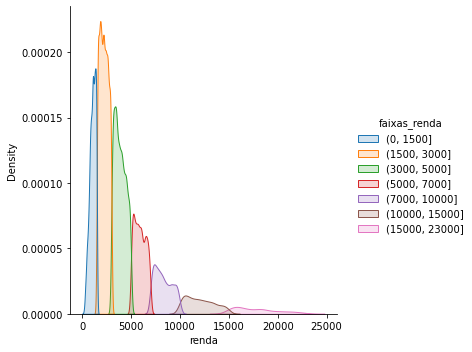

In [15]:
sns.displot(data = df_2, alpha = 0.2, x = 'renda', hue = 'faixas_renda', kind = 'kde', fill=True);

### Análise do ajuste para a maioria dos dados

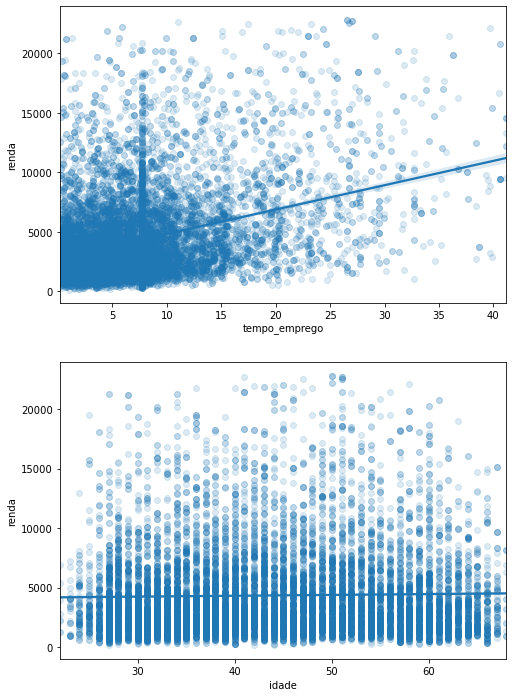

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (8, 12))
#Plotagem dos gráficos de dispersão
for i, var in enumerate(['tempo_emprego', 'idade']):
    sns.regplot(ax = ax[i], 
                x = var, 
                y = 'renda', 
                data = df_2, 
                scatter_kws= {'alpha': 0.15})
#Ajuste dos gráficos
plt.subplots_adjust(hspace = 0.2)

Vamos visualizar a dispersão de **tempo de emprego** e **idade** para diferentes **faixas de renda**

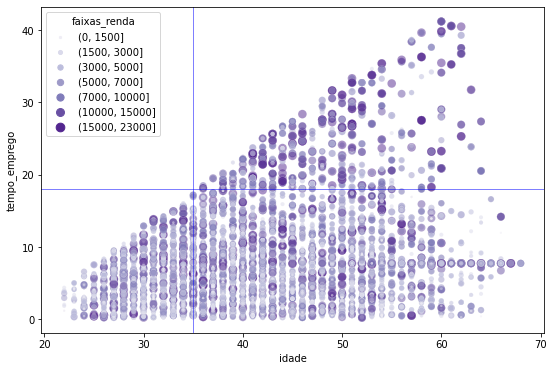

In [17]:
fig, ax = plt.subplots(figsize = (9, 6))
sns.scatterplot(x = 'idade', 
                y = 'tempo_emprego', 
                hue = 'faixas_renda',
                size = 'faixas_renda',
                sizes = (75, 5),
                palette = 'Purples',
                alpha = 0.5,
                data = df_2)
ax.axvline(x = 35, alpha = 0.5, color = 'b', linewidth = 1)
ax.axhline(y = 18, alpha = 0.5, color = 'b', linewidth = 1);

**Cluster** <br>
Observa-se uma concentração de maiores faixas de renda em determinadas regiões do gráfico, o que evidencia a formação de um possível cluster.

### Observação de *pontos discriminantes*


In [18]:
#Definição de um função para plotagem de boxplots, usando configurações pré-definidas
def boxplot(ax: np.ndarray, y: str, data: pd.DataFrame, ylog_scale: bool):
    sns.boxplot(
            ax = ax,
            y = y,
            data = data,
            color = 'purple',
            saturation = 1,
            width = 0.3,
            linewidth = 0.8,
            fliersize = 1.5
          )
    if ylog_scale:
        ax.set(yscale = 'log')
        ax.set_title(f'Boxplot da variável {y} na escala log', fontweight = 'bold')        
    else:
        ax.set_title(f'Boxplot da variável {y}', fontweight = 'bold')

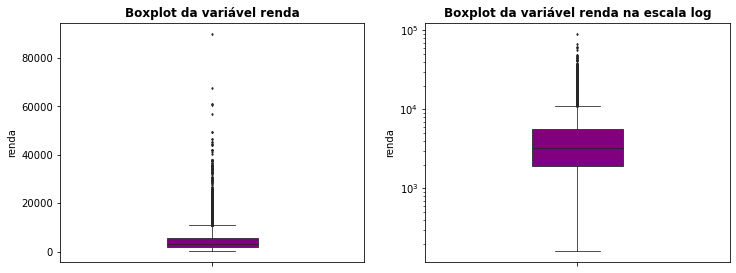

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4.4))

#Boxplot I-Distribuição de Renda para a base de dados completa
boxplot(ax = ax[0], y = 'renda', data = df, ylog_scale = False)
#Boxplot II-Renda na escala log
boxplot(ax = ax[1], y = 'renda', data = df, ylog_scale = True)

#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

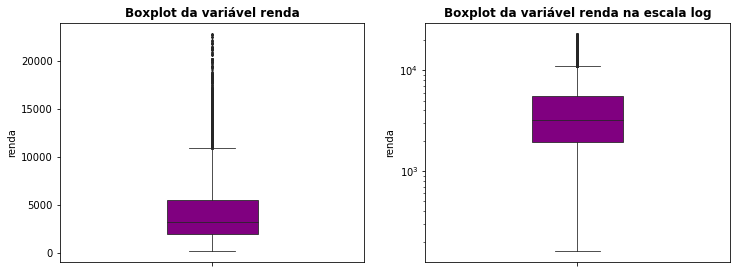

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4.4))

#Boxplot III-Renda <= 23000
boxplot(ax = ax[0], y = 'renda', data = df_2, ylog_scale = False)
#Boxplot IV-Renda <= 23000 na escala log
boxplot(ax = ax[1], y = 'renda', data = df_2, ylog_scale = True)

#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

Por meio da análise dos boxplots, identifica-se a presença de vários pontos afastados do centro de distribuição. A aplicação de escala logarítmica reduz a presença de outliers.

### Transformação da variável resposta

In [21]:
#Criação de um nova coluna para logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])
df.head(2)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,8.122442
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,8.715411


#### Análise do cluster map

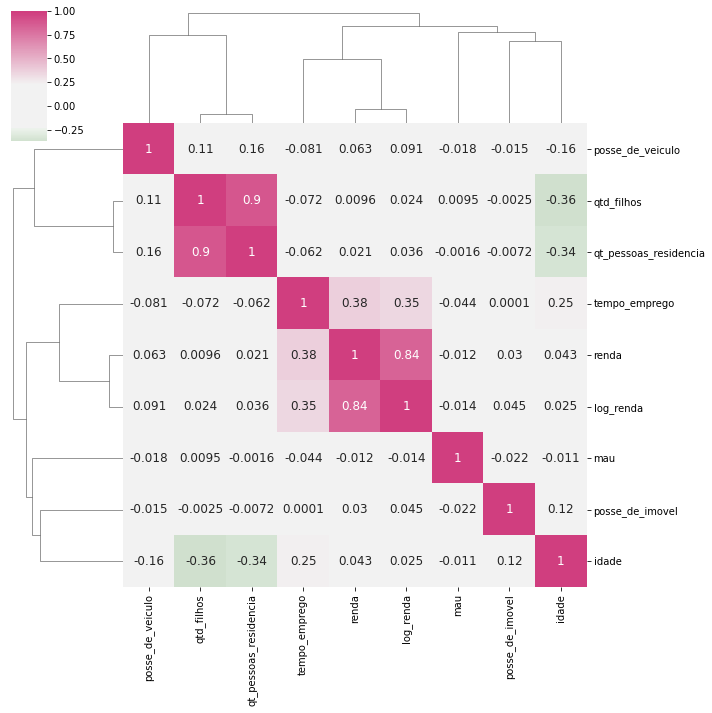

In [22]:
cmap = sns.diverging_palette(h_neg = 125, h_pos = 350, sep = 60, as_cmap = True, center = 'light')
sns.clustermap(df.corr(), center = 0, cmap = cmap, annot = True, annot_kws = {'fontsize': 12});

Agora, `tempo_emprego` e `qt_pessoas_residencia` são as variáveis quantitativas que mais estão correlacionadas com `log_renda`. A variável `idade`possui uma baixa correlação com `log_renda`.

#### Visualizando a relação linear determinada pelo modelos de regressão

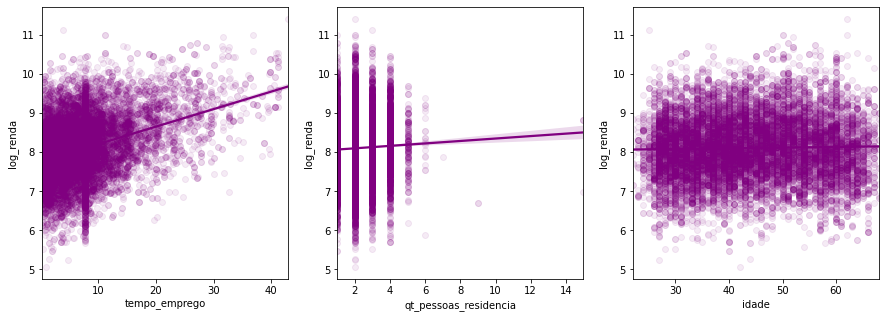

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

cols = ['tempo_emprego', 'qt_pessoas_residencia', 'idade']
for i, col in enumerate(cols):
    sns.regplot(ax = ax[i], 
                x = col, 
                y = 'log_renda', 
                data = df, 
                color = 'purple', 
                scatter_kws = {'alpha': 0.08})

plt.subplots_adjust(wspace = 0.2)

Em vez de utilizarmos uma transformação na variável resposta, também é possível gerar uma mudança de escala do eixo `renda` para uma **escala logarítmica**.

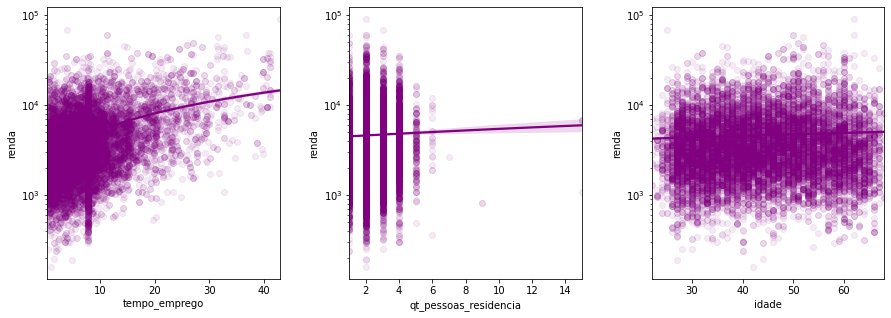

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, col in enumerate(cols):
    sns.regplot(ax = ax[i], 
                x = col, 
                y = 'renda', 
                data = df, 
                color = 'purple', 
                scatter_kws = {'alpha': 0.08})
    ax[i].set(yscale = 'log')

plt.subplots_adjust(wspace = 0.3)

### A transformação logarítmica facilita a análise?

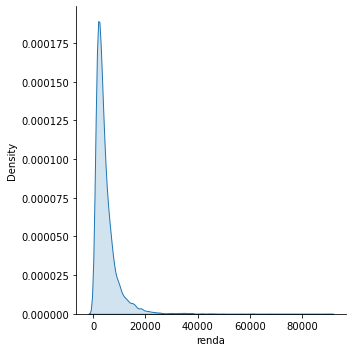

In [25]:
#KDE para a variável 'renda'
sns.displot(data = df, alpha = 0.2, x = 'renda', kind = 'kde', fill=True)

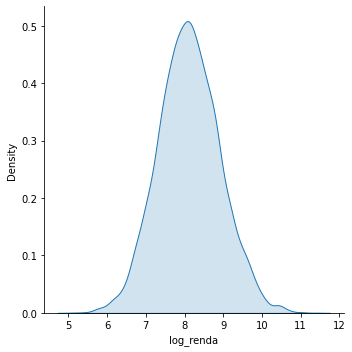

In [26]:
#KDE para a variável 'log_renda'
sns.displot(data = df, alpha = 0.2, x = 'log_renda', kind = 'kde', fill=True)

Com aplicação do *log* para a variável renda, pode-se observar que a distribuição dos dados se tornou mais *normalizada*.Com isso, os pontos se tornam melhor distribuídos e menos sensível aos **outliers**, um padrão fica mais visível. Se observarmos os gráficos de distribuição anteriores para a variável renda, é possível notar que os pontos ficam muito concentrados em um região e o padrão que se visualiza generaliza para essa região, mas não se adequa bem para de valores de renda mais amplos. A pesar de facilitar a análise, a transformação da variável `renda` gera perda de informação, uma vez que estamos trabalhando com valores logarítmicos.  

**Vamos construir um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo com intuito de verificar se há alguma alteração importante a ser investigada**

### Preparação da base de dados

In [27]:
#Series contendo as datas de referência
ds = pd.to_datetime(df.data_ref)
#Coluna contendo apenas o mês e o ano da data de referência 
mes_ano = list(map(lambda s: s.strftime("%m/%Y"), ds))
df['mes_ano'] = mes_ano
df.head(2)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda,mes_ano
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,8.122442,01/2015
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,8.715411,01/2015


### Distribuição das variáveis explicativas no tempo

Para avaliar a distribuição das variáveis explicativas serão utilizados gráficos de barra, sendo que para variáveis com duas categorias serão utilizados gráfico de barras não-empilhados para comparação entre as distribuição. Para variáveis que possuem mais de duas categorias, gráficos de barra empilhados é uma opção mais interessante, pois facilita a visualização dos dados dada a maior quantidade de informação.  

#### Variáveis de apenas duas categorias

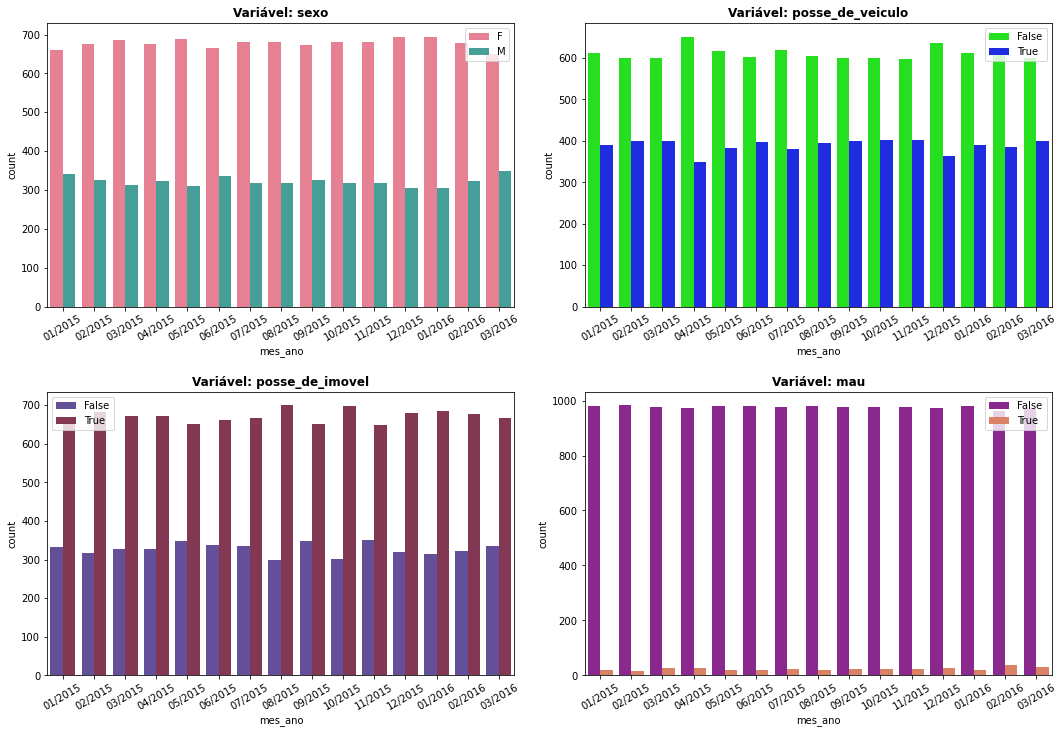

In [28]:
fig, axs = plt.subplots(2, 2, figsize = (18, 12))
#Lista de eixos da figura
axes = fig.get_axes()
#Lista de variáveis
cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'mau']
#Lista de paletas
pcolors = ['husl', 'hsv', 'twilight', 'plasma']
#Plot de Barras não-empilhadas
for ax, col, pcolor in zip(axes, cols, pcolors):
    sns.countplot(ax = ax, 
                  x = 'mes_ano', 
                  hue = col, 
                  data = df,
                  palette = pcolor)
    ax.tick_params(axis = 'x', rotation = 30)
    ax.legend(loc = 'best')
    ax.set_title(label = f'Variável: {col}', fontweight = 'bold')
#Ajuste do espaçamento entre os gráficos    
plt.subplots_adjust(wspace = 0.15, hspace = 0.3)

Não se observam alterações "bruscas" na distribuição dos dados para as variáveis: `sexo`, `posse_de_veiculo`, `posse_de_imovel` e `mau` quando a comparamos para diferentes datas(mês/ano). Podemos dizer que essas variáveis são **estáveis** no tempo.

#### Variáveis de mais de duas categorias

* **Tipo de renda**

In [29]:
#Tabela cruzada da proporção do tipo de renda em cada data(mês/ano)
tab_prop1 = pd.crosstab(df['mes_ano'], df['tipo_renda'], normalize = 'index') 
tab_prop1.head(3)

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
mes_ano,,,,,
01/2015,0.536,0.000,0.218,0.159,0.087
01/2016,0.511,0.000,0.240,0.164,0.085
02/2015,0.522,0.002,0.204,0.174,0.098


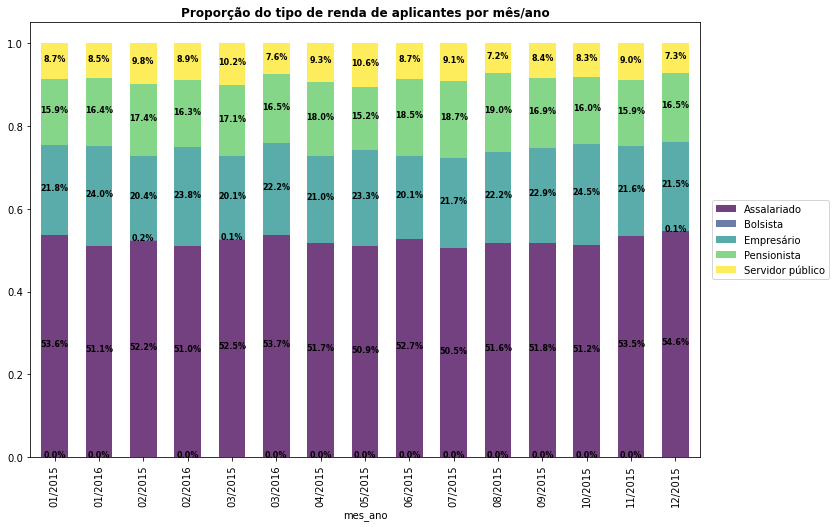

In [30]:
#Plot do gráfico de barras empilhadas
bplot1 = tab_prop1.plot(kind = 'bar', 
                        stacked = True, 
                        width = 0.6, 
                        colormap = 'viridis', 
                        alpha = 0.75, 
                        figsize = (12,8))
#Inclui rótulos da proporção e posiciona no centro de sua respectiva barra
for bar in bplot1.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.1%}',
             color = 'black',
             size = 8,
             weight = 'bold',
             ha = 'center')
plt.legend(loc = 'center right', bbox_to_anchor = (1.2, 0.5))
plt.title(label = 'Proporção do tipo de renda de aplicantes por mês/ano', fontweight = 'bold');

* **Nível de Escolaridade**

In [31]:
#Tabela cruzada da proporção de nível de educaçaõ em cada data(mês/ano)
tab_prop2 = pd.crosstab(index = df['mes_ano'], columns = df['educacao'], normalize = 'index')
tab_prop2.head(3)

educacao,Primário,Pós graduação,Secundário,Superior completo,Superior incompleto
mes_ano,,,,,
01/2015,0.012,0.000,0.684,0.262,0.042
01/2016,0.014,0.000,0.520,0.422,0.044
02/2015,0.022,0.001,0.671,0.265,0.041


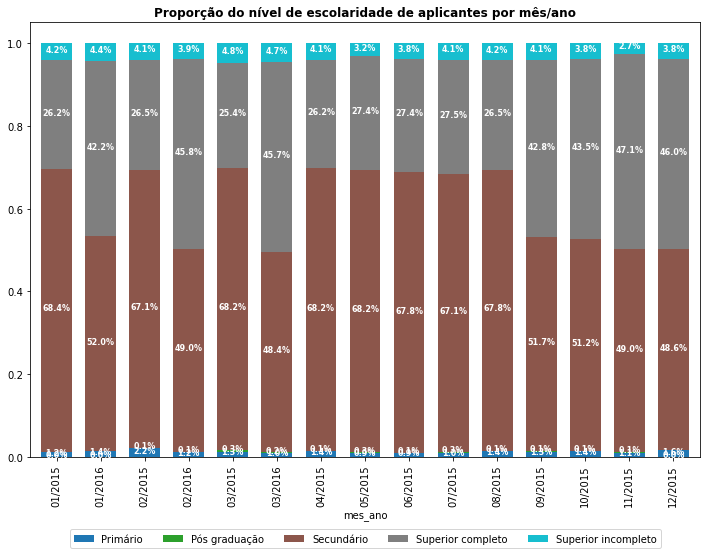

In [32]:
bplot2 = tab_prop2.plot(kind = 'bar', 
                        stacked =  True, 
                        width = 0.7, 
                        colormap = 'tab10', 
                        figsize = (12,8))
for bar in bplot2.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.1%}',
             size = 8,
             color = 'w',
             weight = 'bold',
             ha = 'center')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5,-0.22), ncol = 5)
plt.title(label = 'Proporção do nível de escolaridade de aplicantes por mês/ano', fontweight = 'bold');

Análise: Observa-se um desbalanço da dsitribuição entre alunos da secundária e de alunos do superior completo. A partir de setembro de 2015 a março de 2016, a proporção de alunos da secundária diminui e a proporção de alunos com superior completo aumenta. Isso pode ser atribuído ao período de conclusão do ensino médio e a formatura de universitários.

* **Estado civil**

In [33]:
#Tabela cruzada da proporção do estado civil dos aplicantes em cada data(mês/ano)
tab_prop3 = pd.crosstab(index = df['mes_ano'], columns = df['estado_civil'], normalize = 'index')
tab_prop3.head(3)

estado_civil,Casado,Separado,Solteiro,União,Viúvo
mes_ano,,,,,
01/2015,0.683,0.051,0.128,0.087,0.051
01/2016,0.708,0.071,0.107,0.073,0.041
02/2015,0.708,0.043,0.130,0.070,0.049


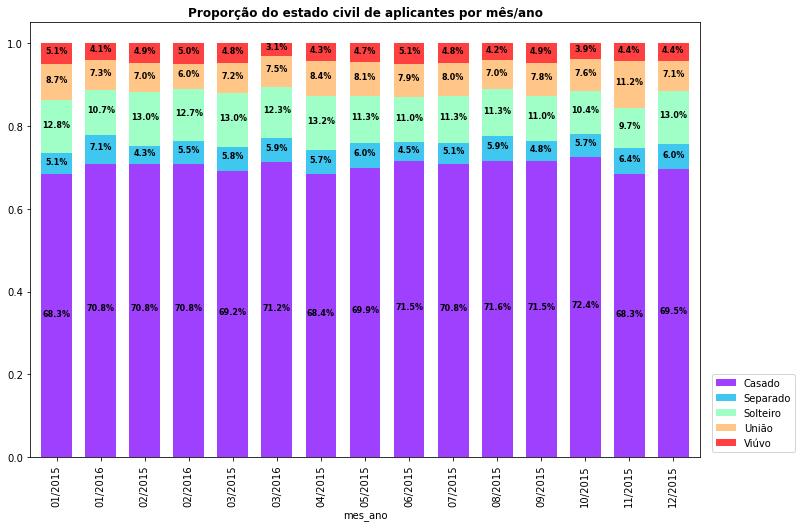

In [34]:
bplot3 = tab_prop3.plot(kind = 'bar', 
                        stacked = True, 
                        width = 0.7, 
                        colormap = 'rainbow', 
                        alpha = 0.75, 
                        figsize = (12, 8))
for bar in bplot3.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.1%}',
             color = 'black',
             weight = 'bold',
             size = 8,
             ha = 'center')
plt.legend(loc = 'lower right', bbox_to_anchor = (1.15, 0))
plt.title(label = 'Proporção do estado civil de aplicantes por mês/ano', fontweight = 'bold');

* **Tipo de residência**

In [35]:
#Tabela cruzada da proporção do tipo de residência em cada data(mês/ano)
tab_prop4 = pd.crosstab(index = df['mes_ano'], columns = df['tipo_residencia'], normalize = 'index')
tab_prop4.head(3)

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
mes_ano,,,,,,
01/2015,0.011,0.913,0.042,0.001,0.006,0.027
01/2016,0.017,0.892,0.045,0.003,0.002,0.041
02/2015,0.012,0.903,0.047,0.004,0.013,0.021


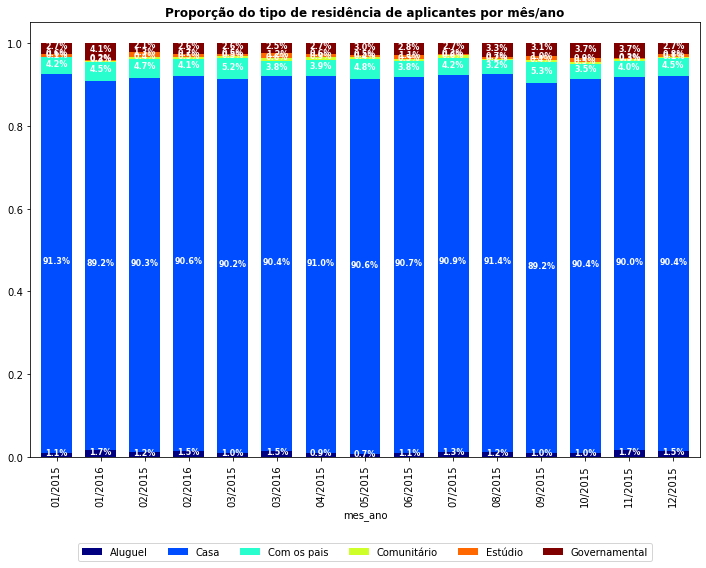

In [36]:
bplot4 = tab_prop4.plot(kind = 'bar', 
                        stacked = True, 
                        width = 0.7, 
                        colormap = 'jet', 
                        figsize = (12, 8))
#bars = list(tab_prop4.index)
#prop = tab_prop4.loc[bar].values
for bar in bplot4.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width() / 2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.1%}',
             size = 8,
             color = 'w',
             weight = 'bold',
             ha='center')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.25), ncol = 6)
plt.title(label = 'Proporção do tipo de residência de aplicantes por mês/ano', fontweight = 'bold');

As variáveis `tipo_renda`, `estado_civil` e `tipo_residencia` também são **estáveis** no tempo. De modo geral, a distribuição das variáveis categóricas são **estáveis**, notando -se apenas variações nítidas na distribuição para `educação`. 

### Perfís de médias da variável resposta no tempo

Nesta parte, serão construidos gráficos mostrando as médias de cada nível da variável no tempo para cada variável qualitativa,  e avaliaremos a estabilidade.

#### Variáveis com apenas duas categorias

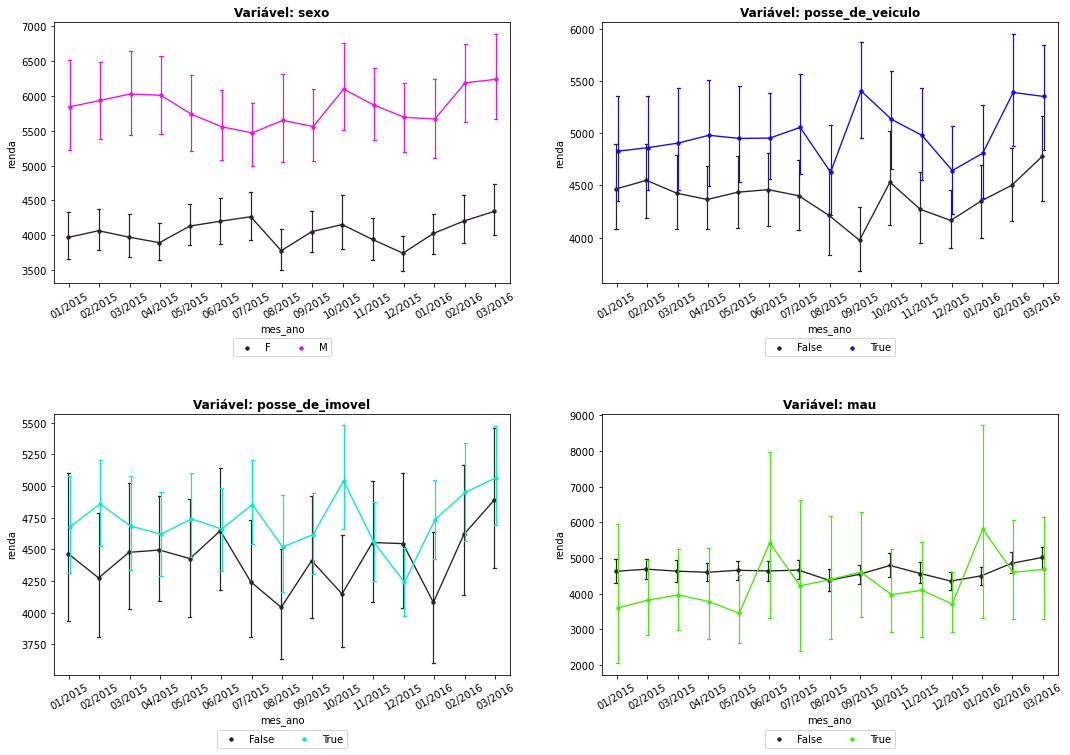

In [37]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
axes = fig.get_axes()
cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'mau']
cores = ['#EF10E5', '#1709E9', '#09E9CB', '#46E909']
for ax, col, cor in zip(axes, cols, cores):
    sns.pointplot(ax = ax,
                  x = 'mes_ano',
                  y = 'renda', 
                  hue = col, 
                  data = df, 
                  dodge = True, 
                  scale = 0.5, 
                  errwidth = 1.2, 
                  capsize = 0.1,
                  color = cor)
    ax.tick_params(axis = 'x', rotation = 30)
    ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3), ncol = 2)
    ax.set_title(label = f'Variável: {col}', fontweight = 'bold')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

**1)** Para `sexo`, observa-se que homens possuem renda superior a mulheres, além disso a média da variável resposta se mostra **estável** ao longo do tempo.

**2)** A `renda` é estatisticamente discriminada pelas variáveis `posse_de_veiculos` e `posse_de_imovel` de forma significativa, Como pode ser observado pelos gráficos de perfís de médias para intervalos de confiança de 90%. Aplicantes que possuem imóveis e veículos recebem, em média, remunerações maiores do que aqueles que não possuem. Para `posse_de_veículo` se nota alguns pontos de inflexão, o mesmo pode ser observado para variável `posse_de_imovel`, no entanto, a variável não generaliza tão bem quanto a variável `posse_de_veiculo`, existem várias interseções entre os intervalos de confiança.

#### Variáveis com mais de duas categorias

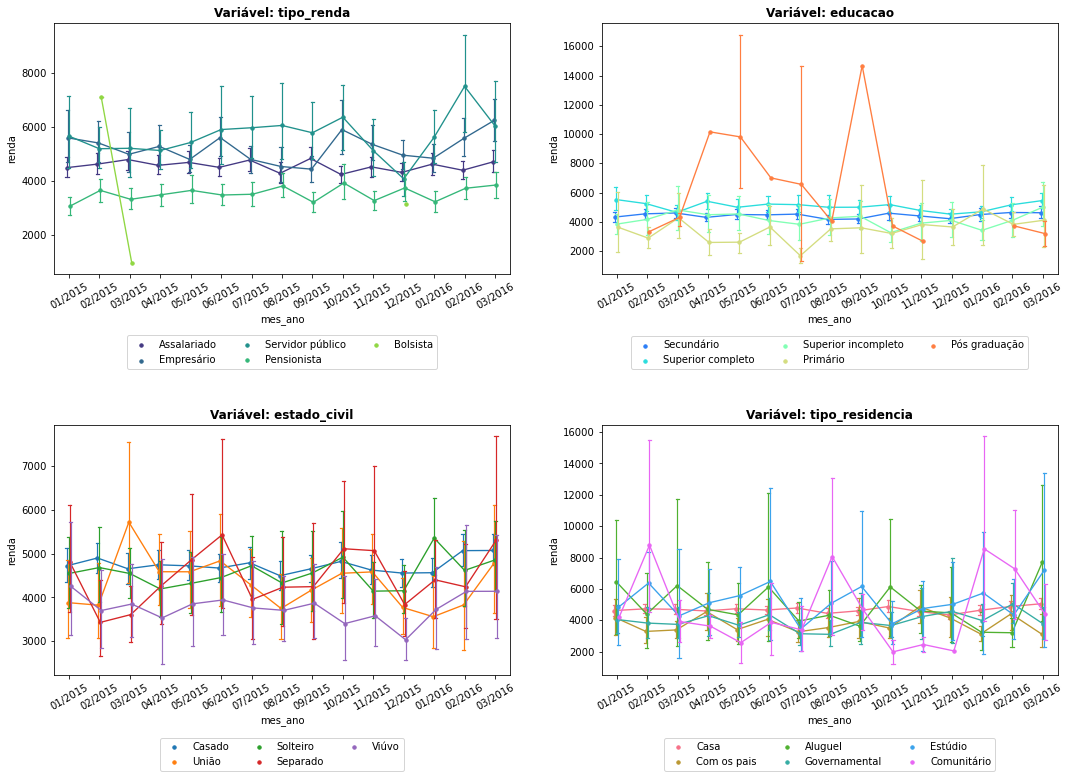

In [38]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
axes = fig.get_axes()
cols = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
pcolors = ['viridis', 'rainbow', 'tab10', 'husl']
for ax, col, pcolor in zip(axes, cols, pcolors):
    sns.pointplot(ax = ax,
                  x = 'mes_ano',
                  y = 'renda', 
                  hue = col, 
                  data = df, 
                  dodge = True, 
                  scale = 0.5, 
                  errwidth = 1.2, 
                  capsize = 0.1,
                  palette = pcolor)
    ax.tick_params(axis = 'x', rotation = 30)
    ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.4), ncol = 3)
    ax.set_title(label = f'Variável: {col}', fontweight = 'bold')
plt.subplots_adjust(wspace = 0.2, hspace = 0.6)

Avaliando a média da renda no tempo para `estado_civil` e por `tipo_residencia`, nota-se que a variável se mostra **instável** no tempo. Para `educacao`, a categoria *pós graduação* possui variações súbitas de renda ao longo do tempo. No entanto, se considerarmos outras categorias, podemos generalizar melhor para a média da renda. Por exemplo, quem possui apenas o *primário* possui média de renda inferior aqueles que possuem *superior completo* ou *superior incompleto*. Ao levar em conta a estabilidade de média de renda por`tipo_renda`, observa-se variações abruptas para categoria *bolsista* e *empresário*.

**Conclusão:** Levando em conta quão estável é a média da variável resposta quando avaliadas por explicativas e quão bem estas generalizam os dados, as variáveis `sexo` e `posse_de_veiculo` se mostram adequadas para a modelagem sem prejudicar a qualidade do modelo, considerando o horizonte de tempo analisado.

## Ajuste de um Modelo de Regressão Linear para explicar `renda`

### Caregando *packages* 

In [39]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Averiguando qual a melhor variável explicativa, para um modelo de regressão linear simples

In [40]:
#Lista de variáveis preditoras
predictors = list(df.drop(columns = ['renda', 'log_renda']).columns)
#Ajustando modelos simples para renda, usando list comprehension
models_renda = [smf.ols(formula = f'renda ~ {X}', data = df).fit() for X in predictors]
#R2 dos modelos
r2_list = [round(model.rsquared, 3) for model in models_renda] 
pd.DataFrame({'Predictor': predictors, 'R-Squared': r2_list})

,Predictor,R-Squared
0,data_ref,0.001
1,sexo,0.033
2,posse_de_veiculo,0.004
3,posse_de_imovel,0.001
4,qtd_filhos,0.000
5,tipo_renda,0.018
6,educacao,0.005
7,estado_civil,0.002
8,tipo_residencia,0.002
9,idade,0.002


### Construindo Modelos Automaticamente

Como podemos observar a variável `renda` possui muitas variáveis explicativas. Vamos criar um função capaz de automatizar o processo de tentar diferentes combinações dessas variáveis como a função **step** do **R**

In [41]:
import itertools
def r_full_step(y: str, X: list, data: pd.DataFrame):
    final_step_object = pd.DataFrame(columns = ['Predictors','R-Squared','AIC'])
    #Iteração com valores de 1,..., n preditores presentes em X (lista de variáveis explicativas)
    for n_predictors in range(2, len(X)+1):
        #lista contendo diferentes combinações de preditores
        var_combinations = list(itertools.combinations(X, n_predictors))
        formulas = []
        list_predictors = []
        for item in var_combinations:
            #Lista de variáveis preditoras em uma combinação específica
            predictors = [item[i] for i in range(len(item))]
            list_predictors.append(predictors)
            #Construção de patsy formula
            f = ' + '.join(predictors)
            formulas.append(f)
            #Ajuste do modelo para cada formula dentro de uma lista construida para um número específico de preditores
            models = [smf.ols(formula = f'{y} ~ {formula}', data = data).fit() for formula in formulas]
            #Lista de R²
            r2_list = [round(model.rsquared, 3) for model in models]
            #Lista contendo valores de AIC
            aic_list = [round(model.aic, 2) for model in models]
            #Montando DataFrame com n preditores ordenado por AIC
            step_object = pd.DataFrame({'Predictors': list_predictors, 'R-Squared': r2_list, 'AIC': aic_list}) \
                            .sort_values(by = 'AIC', ignore_index = True)
        #Concatenando todos os DataFrames gerados em cada iteração
        final_step_object = pd.concat([final_step_object, step_object], ignore_index = True)
    return final_step_object

In [47]:
#Lista de variáveis de acordo com as análises de distribuição e perfis de média no tempo
cols = ['sexo','posse_de_imovel','tipo_renda','educacao', 'idade', 'tempo_emprego']
step_result = r_full_step(y = 'renda', X = cols, data = df)
step_result

,Predictors,R-Squared,AIC
0,"[sexo, tempo_emprego]",0.198,292458.98
1,"[tipo_renda, tempo_emprego]",0.162,293134.42
2,"[educacao, tempo_emprego]",0.149,293365.73
3,"[idade, tempo_emprego]",0.146,293407.63
4,"[posse_de_imovel, tempo_emprego]",0.144,293439.87
5,"[sexo, tipo_renda]",0.047,295064.66
6,"[sexo, idade]",0.040,295165.30
7,"[sexo, educacao]",0.038,295200.72
8,"[tipo_renda, idade]",0.037,295210.83
9,"[sexo, posse_de_imovel]",0.034,295252.95


Usando o método **.iloc**, podemos selecionar a combinação de variáveis em cada iteração que resulta no menor valor de AIC de acordo com o número de variáveis explicativas.

In [48]:
import itertools
def rstep(y: str, X: list, data: pd.DataFrame):
    final_step_object = pd.DataFrame(columns = ['Predictors','R-Squared','AIC'])
    for n_predictors in range(1, len(X)+1):
        var_combinations = list(itertools.combinations(X, n_predictors))
        formulas = []
        list_predictors = []
        for item in var_combinations:
            predictors = [item[i] for i in range(len(item))]
            list_predictors.append(predictors)
            f = ' + '.join(predictors)
            formulas.append(f)
            models = [smf.ols(formula = f'{y} ~ {formula}', data = data).fit() for formula in formulas]
            r2_list = [round(model.rsquared, 3) for model in models]
            aic_list = [round(model.aic, 2) for model in models]
            step_object = pd.DataFrame({'Predictors': list_predictors, 'R-Squared': r2_list, 'AIC': aic_list}) \
                            .sort_values(by = 'AIC', ignore_index = True)
        final_step_object = pd.concat([final_step_object, step_object.iloc[0:1]], ignore_index = True)
    return final_step_object

In [49]:
result = rstep(y = 'renda', X = cols, data = df)
result

,Predictors,R-Squared,AIC
0,[tempo_emprego],0.143,293453.41
1,"[sexo, tempo_emprego]",0.198,292458.98
2,"[sexo, tipo_renda, tempo_emprego]",0.211,292225.23
3,"[sexo, tipo_renda, educacao, tempo_emprego]",0.215,292163.30
4,"[sexo, tipo_renda, educacao, idade, tempo_empr...",0.217,292119.45
5,"[sexo, posse_de_imovel, tipo_renda, educacao, ...",0.219,292090.10


As variáveis `tempo_emprego`, `sexo`, `tipo_renda`, `educacao`, `idade`, `posse_de_imovel` entram nessa ordem para melhor explicar renda.

### Plot dos resíduos pelo  `tempo_emprego`

In [50]:
#Definindo uma função para plotagem dos gráficos de dispersão com configurações pré-definidas
def plot_matrix_resid(nrow: int, ncol: int, x_name: str, target: str, models: list, data: pd.DataFrame,
                      figsize = (14,10), wspace = 0.3, hspace = 0.3, color = 'purple'):
    fig= plt.figure(figsize = figsize)
    for i, model in enumerate(models):
        ax = fig.add_subplot(nrow, ncol, i+1)
        ax.scatter(data[x_name], model.resid, color = color, alpha = 0.5)
        ax.axhline(y = 0, color = 'red')
        ax.set(xlabel = f'{x_name}', ylabel = 'Resíduos')
        ax.set_title(f'Modelo para {target} com R² = {model.rsquared:.3}', fontsize = 11, fontweight = 'bold')
    plt.subplots_adjust(wspace = wspace, hspace = hspace)

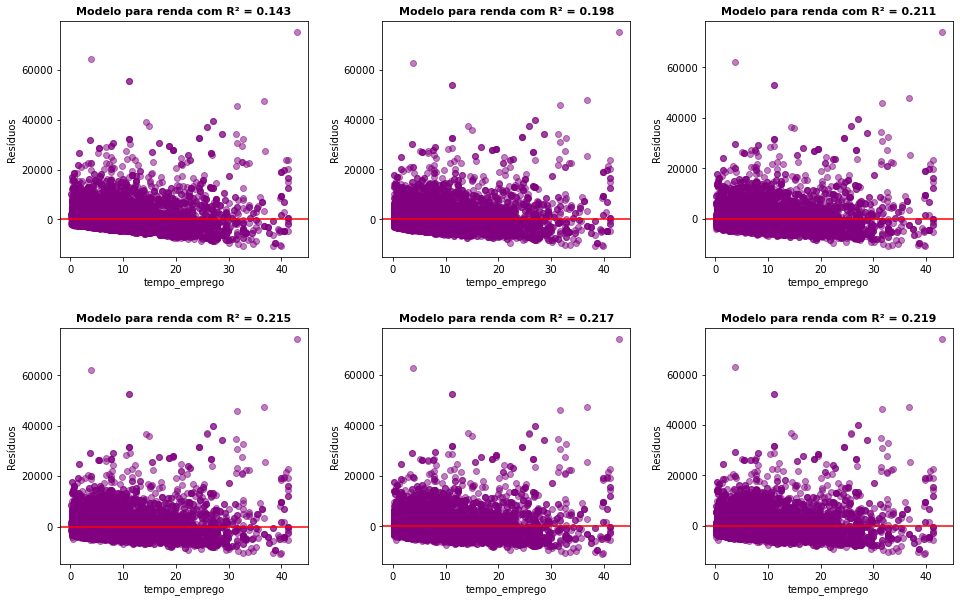

In [51]:
formulas = [' + '.join(predictors) for predictors in list(result['Predictors'])]
models = [smf.ols(f'renda ~ {formula}', data = df).fit() for formula in formulas]
plot_matrix_resid(nrow = 2,
                  ncol = 3,
                  x_name = 'tempo_emprego',
                  target = 'renda',
                  models =models,
                  data = df,
                  figsize = (16, 10)) 